In [1]:
import pandas as pd
import gensim
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,HashingVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import re
from sklearn.cluster import KMeans

In [2]:
# read data 
data = pd.read_csv('bbc-text.csv');

In [3]:
#  lemmatize dan stem preprocessing 
stemmer = SnowballStemmer(language='english',ignore_stopwords=True)
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return ' '.join(result)

In [4]:
# Preprocess  headline text dan simpan ke ‘processed_docs’
processed_docs = data['text'].map(preprocess)
processed_docs.head(10)

0    futur hand viewer home theatr system plasma hi...
1    worldcom boss leav book worldcom boss berni eb...
2    tiger wari farrel gambl leicest rush make andi...
3    yead face newcastl premiership newcastl unit f...
4    ocean raid offic ocean crime caper sequel star...
5    howard hit mongrel jibe michael howard say cla...
6    blair prepar poll date toni blair like elect p...
7    henman hop end dubai seed henman slump straigh...
8    wilkinson face edinburgh england captain jonni...
9    star war children sixth final star war movi su...
Name: text, dtype: object

In [5]:
# menghitung Vectors sebagai fitur
# membuat dan menghitung vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(processed_docs)

# transform  training dan validation data menggunakan  vectorizer object
count_vec =  count_vect.transform(processed_docs)

In [6]:
# parameter cluster K =3
final_model=KMeans(3)
final_model.fit(count_vec)
prediction=final_model.predict(count_vec)

In [7]:
data["clusters"] = prediction

d:\phyton\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='clusters', ylabel='count'>

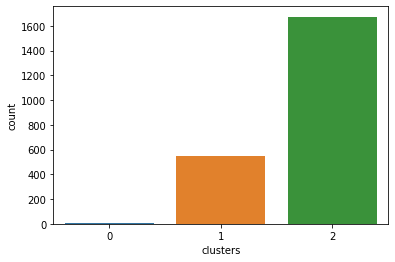

In [8]:
# plot total data pada cluster
sns.countplot(data["clusters"])

In [9]:
data[data["clusters"] == 0].head()

,category,text,clusters
408,politics,terror powers expose tyranny the lord chance...,0
865,entertainment,brits debate over urban music joss stone a ...,0
1604,politics,kilroy launches veritas party ex-bbc chat sh...,0
1615,entertainment,scissor sisters triumph at brits us band sciss...,0


In [10]:
data[data["clusters"] == 1].head()

,category,text,clusters
0,tech,tv future in the hands of viewers with home th...,1
5,politics,howard hits back at mongrel jibe michael howar...,1
21,tech,halo 2 heralds traffic explosion the growing p...,1
24,tech,mobile audio enters new dimension as mobile ph...,1
28,politics,terror suspects face house arrest uk citizens ...,1


In [11]:
data[data["clusters"] == 2].head()

,category,text,clusters
1,business,worldcom boss left books alone former worldc...,2
2,sport,tigers wary of farrell gamble leicester say ...,2
3,sport,yeading face newcastle in fa cup premiership s...,2
4,entertainment,ocean s twelve raids box office ocean s twelve...,2
6,politics,blair prepares to name poll date tony blair is...,2
